## Time between sexist crimes

<p class="aligncenter">
    <img src="machist violence.png" alt="https://unrealitymag.com"
         width = 1000/>
</p>

Let's try something more serious. In 2020 43 gender-based violence crimes took place in Spain, this is, 43 women were murdered by their partners during this year:

<https://elpais.com/sociedad/2020-03-27/cronologia-de-victimas-mortales-de-violencia-de-genero-de-2020.html>

Could we predict based on the distribution of the interval between crimes which is the probability of a crime occuring as days go over? By the nature of the data, we should have an a priori exponentail distribution. Let's use `dexp` (desity distribution) and `pexp` The limit of `dexp` is 0, and the limit of `pexp` is 1 (this is, the possibility of having all random values).

<p align="center">
  $${
  \lambda = \frac{1}{\overline{mean.interval}}}$$
</p>
<p align="center">

    If a random variable X follows an exponential distribution, then the probability density function of X can be written as

$${
    dens.p=\lambda e^{-\lambda x}
 }$$ 
    
and therefore, the cumulative distribution function of X can be written as:
  
   $${
        cum.p=1-e^{-\lambda x}
        }$$    
    
    <https://en.wikipedia.org/wiki/Exponential_distribution>
        
     

In [6]:
crime.interval<-c(
6,6,4,4,0,3,3,5,4,8,7,1,6,7,4,9,14,23,4,14,30,1,6,1,3,13,3,3,7,4,3,1,1,6,12,1,2,20,18,5,1,23,25
)
str(crime.interval)

 num [1:43] 6 6 4 4 0 3 3 5 4 8 ...


In [2]:
#write.csv(angry.times,"anger.times.csv")

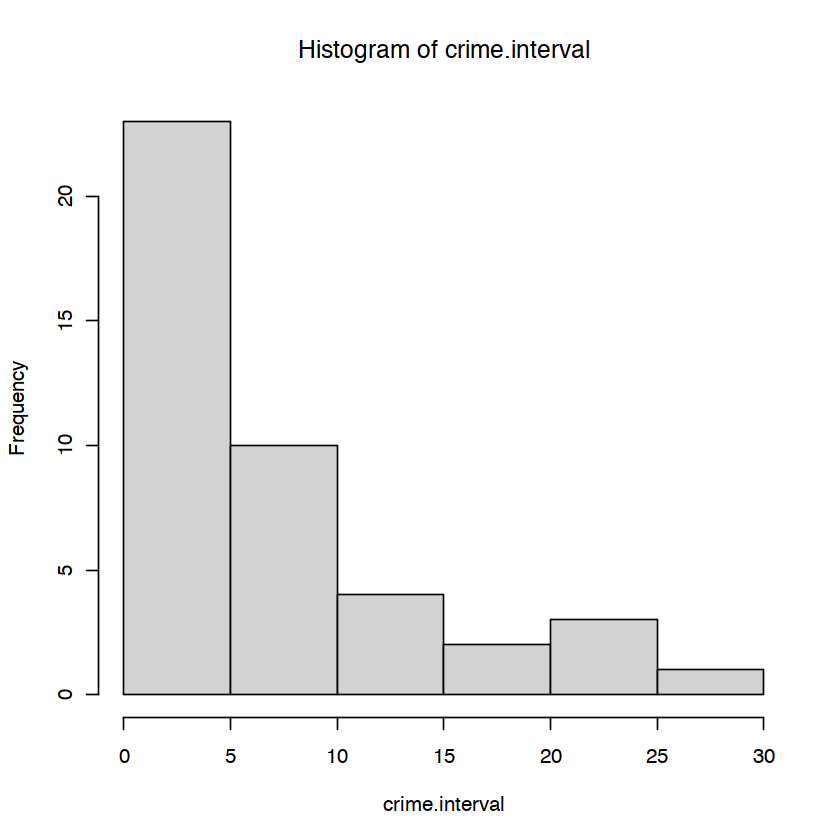

In [7]:
hist(crime.interval)
#it does look exponential, the histogram has positive asymetry
#most crime intervals are clustered in less than a couple of weeks

In [9]:
crime.ecdf<-ecdf(crime.interval)
summary(crime.ecdf)

Empirical CDF:	  18 unique values with summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    4.25    8.50   11.11   17.00   30.00 

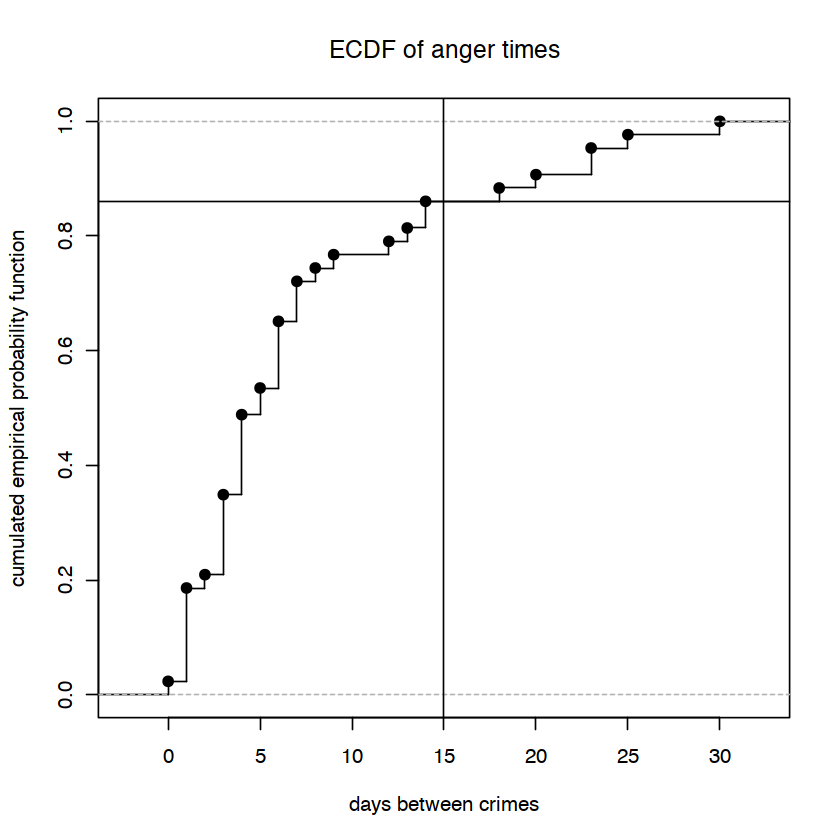

In [14]:
plot(crime.ecdf, xlab = 'days between crimes',
     main = 'ECDF of anger times',ylab="cumulated empirical probability function",verticals=T)
     #more than 80% of crimes occurred in an interval of less than 15 days roughly, and 100% of the crimes occurred in
     #less than a month
     #now, this is a serious number
     abline(v=15)
     abline(h=0.86)

In [15]:
summary(crime.interval)
media<-mean(crime.interval)
#wow, we have an average of a crime per evey 7 days.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   5.000   7.465   8.500  30.000 

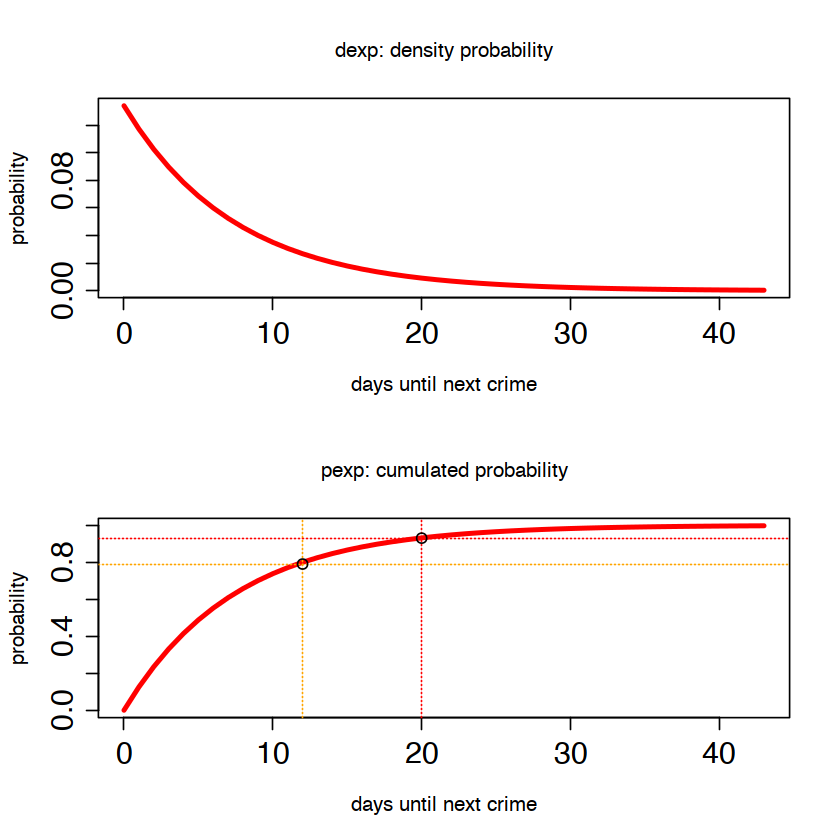

In [23]:
par(mfrow = c(2, 1))
sample <- seq(0, length(crime.interval), by = 1)# Specify x-values 
#for exp function
#Now, we can apply the dexp function with a rate of 5 as follows:
prob <- dexp(sample, rate = 1/media)  

plot(sample,prob,main="dexp: density probability",
     type="l",lwd=3,col="red",xlab="days until next crime",
     ylab="probability",cex.lab=1,cex.axis=1.5,
     cex.main=1)
     
#Now, we can apply the dexp function with a rate of 7 days as follows:
prob <- pexp(sample, rate = 1/media)  

plot(sample,prob,main="pexp: cumulated probability",
     type="l",lwd=3,col="red",xlab="days until next crime",
     ylab="probability",cex.lab=1,cex.axis=1.5,
     cex.main=1)
     abline(v=12,h=0.79,col="orange",lty=3)
     abline(v=20,h=0.93,col="red",lty=3)
     points(12,0.79)
     points(20,0.93)

In [31]:
pexp(7,1/media)#the cumulated density prob of a crime after 12 days
pexp(12,1/media)#the cumulated density prob of a crime after 12 days
pexp(20,1/media)#the cumulated density prob of a crime after 20 days
pexp(30,1/media)#the cumulated density prob of a crime after 20 days
df<-data.frame(days=sample,prob=prob)#for ggpplot2

[1] 0.6084706

[1] 0.7996074

[1] 0.931377

[1] 0.9820235

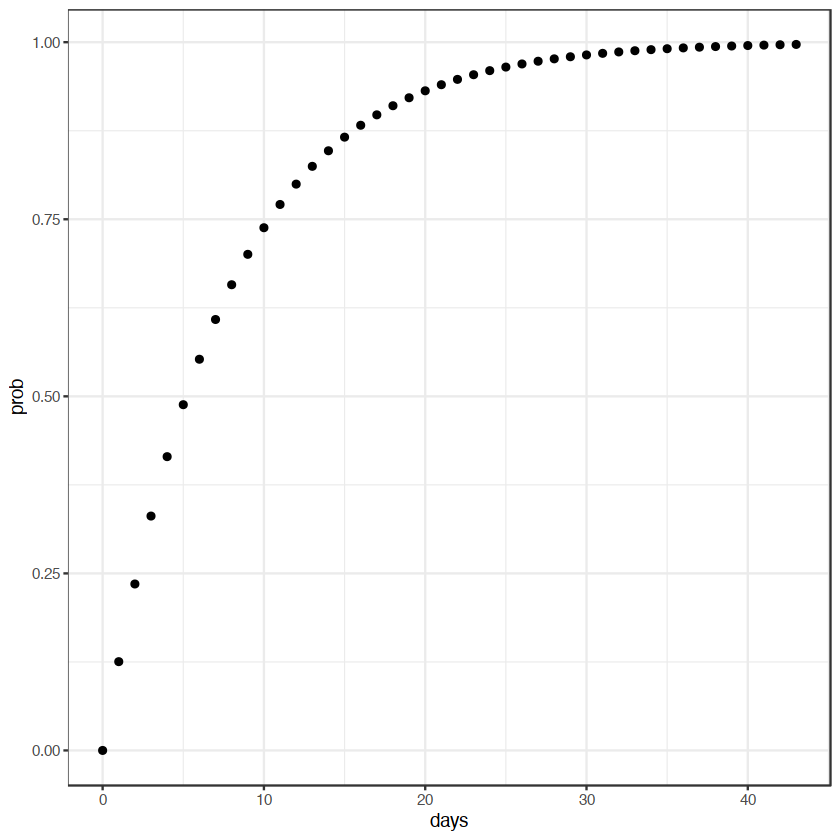

In [34]:
library(ggplot2)
ggplot(data=df,aes(days,prob))+geom_point()+theme_bw()

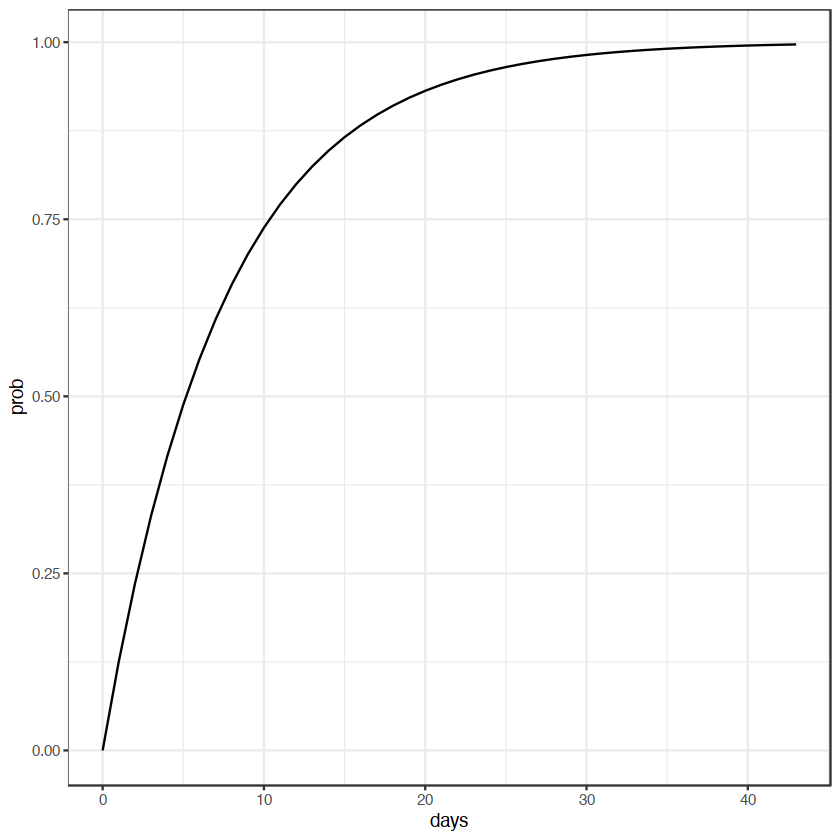

In [39]:
ggplot(data=df,aes(days,prob))+geom_line()+theme_bw()

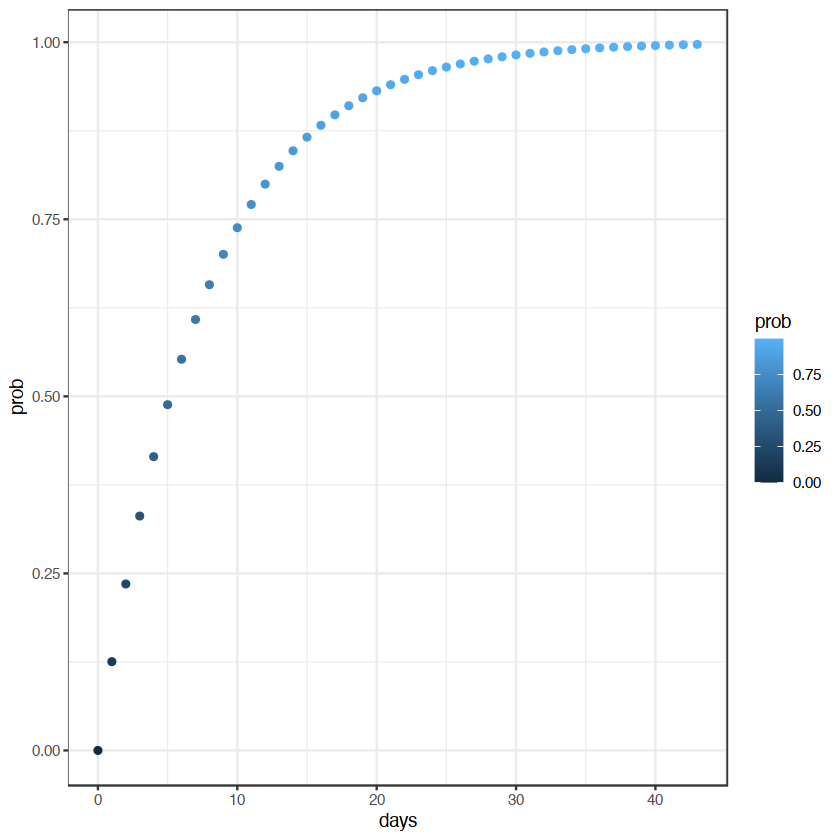

In [41]:
ggplot(data=df,aes(days,prob,col=prob))+geom_point()+theme_bw()

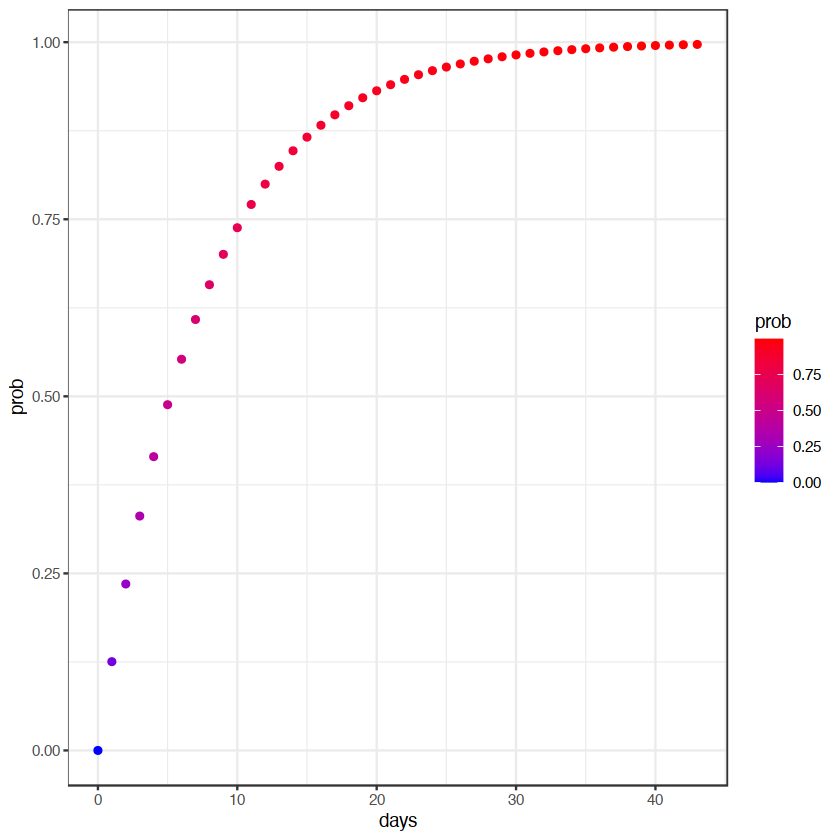

In [66]:
ggplot(data=df,aes(days,prob))+geom_point(aes(color = prob),size=1.5)+theme_bw()+
scale_color_gradient(low = "blue", high = "red")

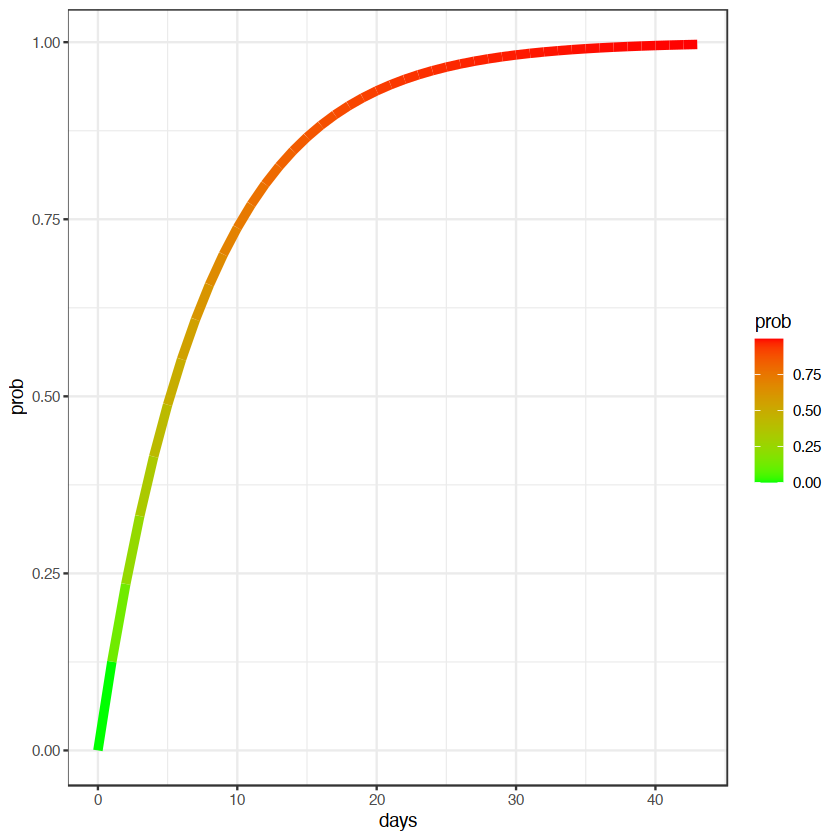

In [65]:
ggplot(data=df,aes(days,prob))+geom_line(aes(color = prob),size=2)+theme_bw()+
scale_color_gradient(low = "green", high = "red")

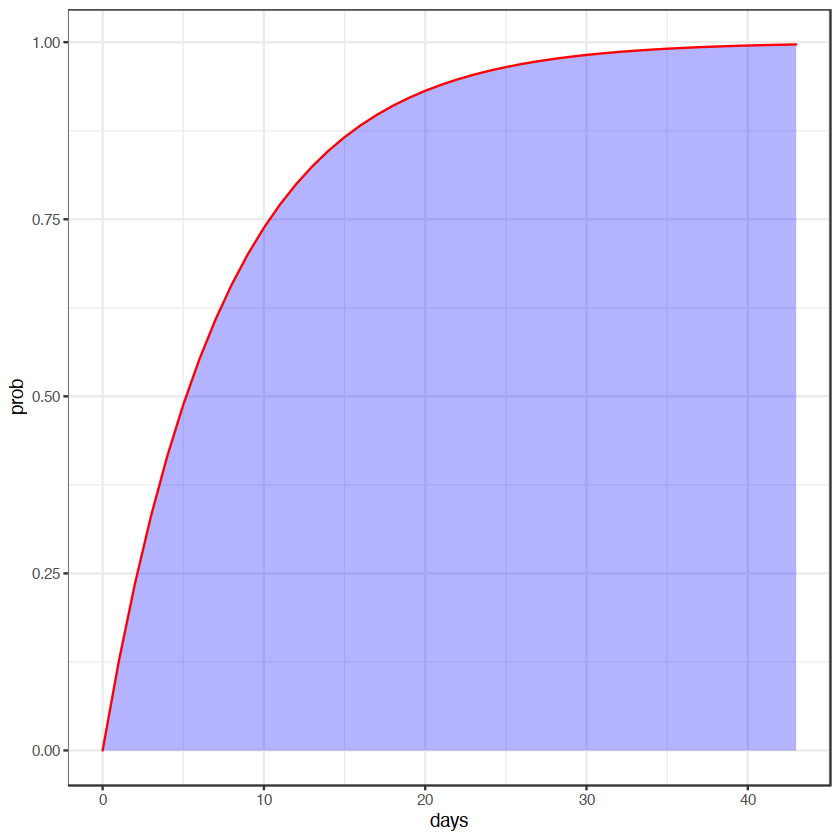

In [67]:
ggplot(data = df, mapping = aes(x = days, y = prob)) +
    geom_area(col="red",fill="blue",alpha=0.3)+theme_bw()

In [68]:
#

**Interpretation**:

`dexp()` returns the corresponding value of the exponential density for an input day. Still puzzles me is that the probability of an exact value must be 0 in theory. The easy answer is that is not the exact probability of any random value, but the probability density for that value, well, same counterintuitive think occurs for any density plot. This means that most crimes are centered in the first week, this is a really scary interval.

`pexp()` is the probability that the angry time is less than or equal than a certain value, the cumulated probability as days pass. So yes, this is a similar idea to the empirical probability density function (ECDF), only that the latter is the actual proportion of a value equal or less than a particular day, whereas the value of `pexp` here refers to a cumulated exponential probability distribution under the particular rate, lambda, in this case `1/7`. This means, for example, that after a 2 weeks passed without a crime the probability of one ocurring goes above 80%, and after 20 days the probability of having a crime goes beyond 90%, so police should be really alert after this period. 

Both `dexp` and `pexp` demonstrate the meaning of the exponential function, only that it does not go exponentially forever as the limit of `dexp` is 0, and the limit of `pexp` is 1 (this is, the possibility of having all random values), but wont never get to 1. On the contrary `ecdf` will get to the 100% of all values at the highest observed value.

<p align="center">
  $${
  \lambda = \frac{1}{\overline{interval}}}$$</p>
<p align="center">

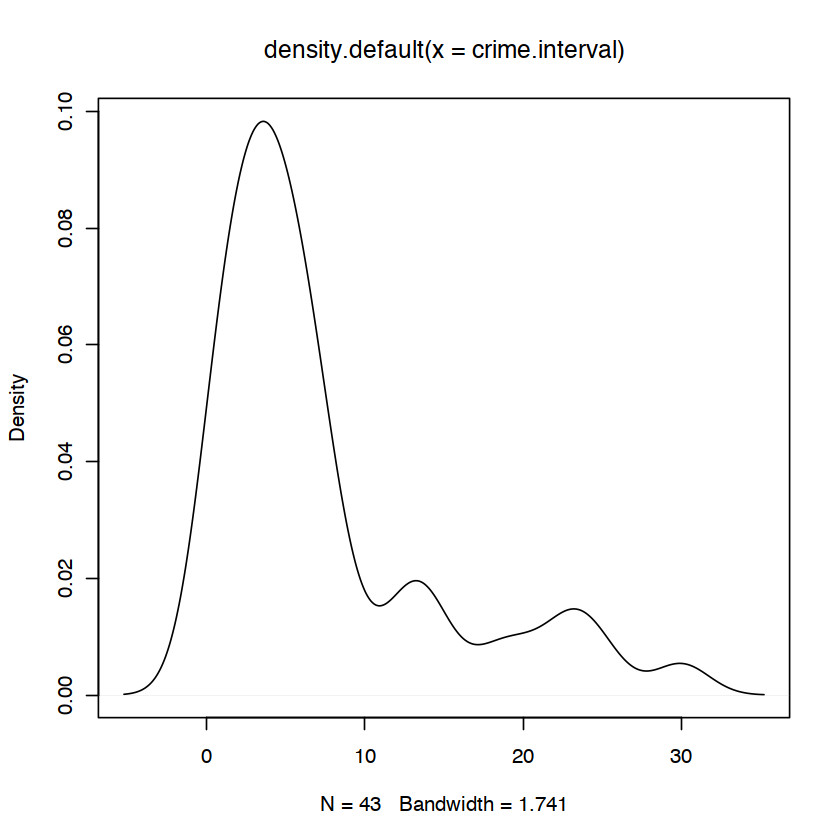

In [25]:
plot(density(crime.interval))
#this is the observed density plot, so that it is related to dexp,
#only that here the smoothing parameter is key

In [32]:
dexp(7,1/media)#the density prob of crime in an interval of 7 days
pexp(20,1/media)#the cumulated density prob of a crime after 20 days

[1] 0.05244786

[1] 0.931377

[1] -0.008603387

[1] 0.1253718

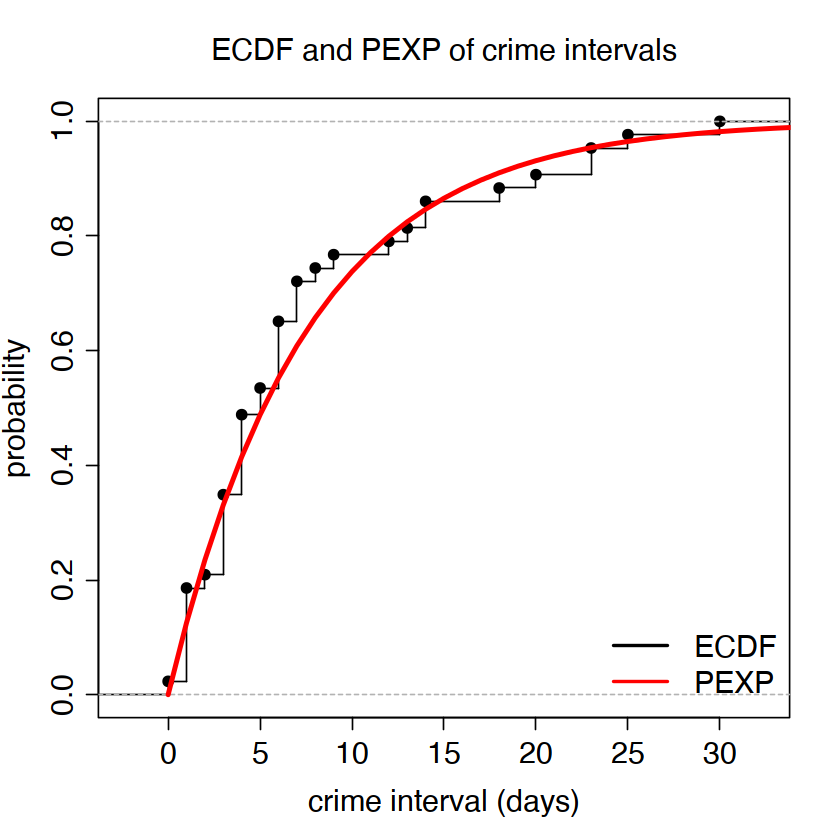

In [30]:
#relation between ECDF and pexp
plot(crime.ecdf, xlab = 'crime interval (days)',
     main = 'ECDF and PEXP of crime intervals',ylab="probability",verticals=T,
     cex.lab=1.5,cex.axis=1.5,
     cex.main=1.5)
lines(sample,prob,main="pexp",
     type="l",lwd=3,col="red")
legend("bottomright", c("ECDF", "PEXP"),
       lty = c(1, 1), col = c("black", "red"), box.lty = 0, lwd = 2,cex=1.5)
#aha!!!
#"only" difference is that according to pexp the interval probability will approach 1
#but wont ever get to 1

Here an interesting point, how much data do we need to have to have a representativa sample size. Well, the question is representative of what, if it is representative of a year, we actually collected the data in a year, it is what it is. But well say that the question is whether 1 year of data, this is, 43 crime intervals, are enough to represent what occurs during 10 years, a decade. Well, let's use our 1 year pilot study then where we have a mean interval, and say the error is the 3% of that mean... Thus cause we are assessing the mean time interval between crimes, which is 7.46 days, then a 3% allowable error would be 0.22 days (0.03 × 7.46). The formula for estimating the required sample size for a mean is:


<p align="center">
  $${
  n=\frac{z^{2}\sigma ^{2}}{e^{2}}
  }$$
</p>



but, where does this come from? I guess it comes from the notion of the confidence interval:
    
<p align="center">
  $${
  z\frac{S}{\sqrt{n}}
  }$$
</p>
    
    so that the estimate is: 
    
  <p align="center">
  $${
  \bar{x}\pm z\frac{S}{\sqrt{n}}
  }$$
</p>

Note that S/n^2 is SE, the standar error

In particular a 95% confidence interval of a mean estimate is given by the formula
 
 Estimate ± 1.96 × SE 
 
 but... how do we get from this to
 
 <p align="center">
  $${
  n=\frac{z^{2}\sigma ^{2}}{e^{2}}
  }$$
</p>
 
The formula for any standard error always contains n, the sample size. Therefore, if you specify the width of the 95% confidence interval, you have a formula that you can solve to find n.

<https://www.statstutor.ac.uk/resources/uploaded/sample-size.pdf>

In [72]:
(m<-mean(crime.interval))
(e<-0.03*m)
(s<-sd(crime.interval))
n<-(1.96^2*s^2)/e^2
n
#we cannot have an estimate of what the population would be for the 10yr
#certainly is not 10*365
#neither 10*43
#but 4192 is an exageration tools
#and... if that'd be so, then is a crime to wait to have so much data,
#as we are letting people die without taking actions earlier
#on the distribution observed in just a year

[1] 7.465116

[1] 0.2239535

[1] 7.398033

[1] 4192.075